In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from check_lang import lang_checker_langdetect
from functions import *
from Preprocessing import *

# pd.options.mode.chained_assignment = None  # default='warn'

d:\GitHub\Jurnal-Clustering\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
df = pd.read_csv('data/data_sinta_raw_s4_full.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

df.title = df.title.apply(lambda x : x.lower())

df

,jid,eissn,desc,title,date
0,10000,25803786,Teknologi reproduksi aseksual anemon merupakan...,alih teknologi produksi benih anemon laut sec...,2017-04-28
1,10000,25803786,Kegiatan ini bertujuan untuk meningkatkan kual...,peningkatan kualitas produk olahan sambusaq tu...,2017-04-28
2,10000,25803786,Kegiatan Pengabdian kepada Masyarakat ini dila...,model pemanfaatan urine sapi sebagai pupuk org...,2017-04-28
3,10000,25803786,Sulawesi Selatan khususnya Kabupaten Enrekang ...,penerapan teknologi tepat guna pada pengolahan...,2017-04-28
4,10000,25803786,Kabupaten Sidrap menembus angka 94 kasus HIV-A...,penyuluhan pencegahan dan penularan hiv-aids p...,2017-04-28
...,...,...,...,...,...
348026,9996,26152835,Feline panleukopenia is an infectious disease ...,feline panleucopenia in bengal cats at hasanud...,2023-11-08
348027,9996,26152835,Turtles are reptiles that are very easy to rec...,a case handling bladder stone on the turtle (c...,2024-03-10
348028,9996,26152835,The objective of this study was to see whether...,bentonite addition in quail diet (coturnix-cot...,2024-02-28
348029,9996,26152835,This study aims to determine the histological ...,comparative histology of the skin between sumb...,2024-04-29


In [4]:
# selected_eissn = df.eissn.sample().values[-1]
# selected_eissn

In [5]:
# eissn = '26543915' Jurnal Darma Agung

# selected_journal = df[df.eissn == selected_eissn]
selected_journal = df.loc[df.eissn == '26543915', :]
selected_journal

,jid,eissn,desc,title,date
210447,18473,26543915,"Dalam konteks perusahaan start-up, dinamika ke...",dinamika kepemimpinan transformasional dalam m...,2024-05-02
210448,18473,26543915,This study aims at determining the significant...,pengaruh model pembelajaran kooperatif nht (nu...,2020-05-20
210449,18473,26543915,Kabupaten samosir merupakan daerah yang berpot...,implementasi peraturan pemerintah nomor 27 tah...,2022-11-09
210450,18473,26543915,Air preheater B Tipe Ljungstrom adalah jenis A...,analisis efektivitas alat penukar kalor air pr...,2024-02-29
210451,18473,26543915,Dengan makin berkembangnya ilmu pengetahuan da...,perancangan mesin pengayak pasir dengan kapasi...,2018-10-03
...,...,...,...,...,...
211135,18473,26543915,Website Selain berfungsi sebagai sarana inform...,sistem informasi pemesanan perbaikan kendaraaa...,2022-10-31
211136,18473,26543915,Mengabadikan setiap momen penting dalam hidup ...,kompilasi expresi dokumentasi persalinan pada...,2024-02-21
211137,18473,26543915,Asuransi ialah yang memberikan pembayaran seju...,penyelesaian klaim asuransi jiwa pada pt. prud...,2022-04-20
211138,18473,26543915,Penelitian berjudul “Komunikasi Antarpribadi G...,komunikasi antarpribadi guru bimbingan konseli...,2023-12-26


In [6]:
selected_journal['data_cleaned'] = selected_journal.desc.apply(preprocess_text)
selected_journal['data_cleaned'] = selected_journal.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)  
selected_journal['lang'] = selected_journal.data_cleaned.apply(lang_checker_langdetect)

selected_journal

C:\Users\rarmn\AppData\Local\Temp\ipykernel_9036\3472491142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal['data_cleaned'] = selected_journal.desc.apply(preprocess_text)
C:\Users\rarmn\AppData\Local\Temp\ipykernel_9036\3472491142.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  selected_journal['data_cleaned'] = selected_journal.loc[:, ['title', 'data_cleaned']].apply(lambda x : '{} {}'.format(x[0], x[1]), axis = 1)
C:\Users\rarmn\AppData\Local\Temp\ipykernel_9036\3472491142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a

,jid,eissn,desc,title,date,data_cleaned,lang
210447,18473,26543915,"Dalam konteks perusahaan start-up, dinamika ke...",dinamika kepemimpinan transformasional dalam m...,2024-05-02,dinamika kepemimpinan transformasional dalam m...,id
210448,18473,26543915,This study aims at determining the significant...,pengaruh model pembelajaran kooperatif nht (nu...,2020-05-20,pengaruh model pembelajaran kooperatif nht (nu...,en
210449,18473,26543915,Kabupaten samosir merupakan daerah yang berpot...,implementasi peraturan pemerintah nomor 27 tah...,2022-11-09,implementasi peraturan pemerintah nomor 27 tah...,id
210450,18473,26543915,Air preheater B Tipe Ljungstrom adalah jenis A...,analisis efektivitas alat penukar kalor air pr...,2024-02-29,analisis efektivitas alat penukar kalor air pr...,id
210451,18473,26543915,Dengan makin berkembangnya ilmu pengetahuan da...,perancangan mesin pengayak pasir dengan kapasi...,2018-10-03,perancangan mesin pengayak pasir dengan kapasi...,id
...,...,...,...,...,...,...,...
211135,18473,26543915,Website Selain berfungsi sebagai sarana inform...,sistem informasi pemesanan perbaikan kendaraaa...,2022-10-31,sistem informasi pemesanan perbaikan kendaraaa...,id
211136,18473,26543915,Mengabadikan setiap momen penting dalam hidup ...,kompilasi expresi dokumentasi persalinan pada...,2024-02-21,kompilasi expresi dokumentasi persalinan pada...,id
211137,18473,26543915,Asuransi ialah yang memberikan pembayaran seju...,penyelesaian klaim asuransi jiwa pada pt. prud...,2022-04-20,penyelesaian klaim asuransi jiwa pada pt. prud...,id
211138,18473,26543915,Penelitian berjudul “Komunikasi Antarpribadi G...,komunikasi antarpribadi guru bimbingan konseli...,2023-12-26,komunikasi antarpribadi guru bimbingan konseli...,id


In [7]:
le = LabelEncoder()
selected_journal['label'] = le.fit_transform(selected_journal.eissn)
selected_journal

C:\Users\rarmn\AppData\Local\Temp\ipykernel_9036\2972708748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal['label'] = le.fit_transform(selected_journal.eissn)


,jid,eissn,desc,title,date,data_cleaned,lang,label
210447,18473,26543915,"Dalam konteks perusahaan start-up, dinamika ke...",dinamika kepemimpinan transformasional dalam m...,2024-05-02,dinamika kepemimpinan transformasional dalam m...,id,0
210448,18473,26543915,This study aims at determining the significant...,pengaruh model pembelajaran kooperatif nht (nu...,2020-05-20,pengaruh model pembelajaran kooperatif nht (nu...,en,0
210449,18473,26543915,Kabupaten samosir merupakan daerah yang berpot...,implementasi peraturan pemerintah nomor 27 tah...,2022-11-09,implementasi peraturan pemerintah nomor 27 tah...,id,0
210450,18473,26543915,Air preheater B Tipe Ljungstrom adalah jenis A...,analisis efektivitas alat penukar kalor air pr...,2024-02-29,analisis efektivitas alat penukar kalor air pr...,id,0
210451,18473,26543915,Dengan makin berkembangnya ilmu pengetahuan da...,perancangan mesin pengayak pasir dengan kapasi...,2018-10-03,perancangan mesin pengayak pasir dengan kapasi...,id,0
...,...,...,...,...,...,...,...,...
211135,18473,26543915,Website Selain berfungsi sebagai sarana inform...,sistem informasi pemesanan perbaikan kendaraaa...,2022-10-31,sistem informasi pemesanan perbaikan kendaraaa...,id,0
211136,18473,26543915,Mengabadikan setiap momen penting dalam hidup ...,kompilasi expresi dokumentasi persalinan pada...,2024-02-21,kompilasi expresi dokumentasi persalinan pada...,id,0
211137,18473,26543915,Asuransi ialah yang memberikan pembayaran seju...,penyelesaian klaim asuransi jiwa pada pt. prud...,2022-04-20,penyelesaian klaim asuransi jiwa pada pt. prud...,id,0
211138,18473,26543915,Penelitian berjudul “Komunikasi Antarpribadi G...,komunikasi antarpribadi guru bimbingan konseli...,2023-12-26,komunikasi antarpribadi guru bimbingan konseli...,id,0


In [8]:
tst = selected_journal.sample()[['title', 'desc', 'data_cleaned']]
tst.title.values[-1], tst.desc.values[-1], tst.data_cleaned.values[-1]

('an analysis of illocutionary acts used in joe biden’s presidential speech 2024',
 'Pemimpin politik identik dengan pemimpin negara yang selalu menyampaikan pidato dalam kegiatan tertentu. Pidato yang disampaikan mengandung tujuan dan makna tertentu. Penyajian informasi oleh pembicara sering mengalami kesalahpahaman tafsiran makna dan tujuan dari pembicara oleh pendengar. Dalam penelitian ini peneliti fokus pada pidato presiden Joe Biden tahun 2024 dengan tujuan untuk meneliti dan menemukan jenis-jenis tindak tutur dalam pidato tersebut. Dalam pidato Joe Biden, peneliti menggunakan teori ilokusi berdasarkan fungsinya. Menurut Leech dimana terdapat 4 tipe utama yaitu kolaboratif, kompetitif, ramah, dan konflik untuk menentukan jenis tindak ilokusi yang terdapat dalam pidato Joe Biden dan mencari tipe dominan yang digunakan dalam pidatonya. Metode penelitian ini menerapkan metode deskriptif kualitatif. Dalam penelitian ini peneliti menemukan bahwa keempat jenis fungsi tindak ilokusi ter

<Axes: xlabel='lang'>

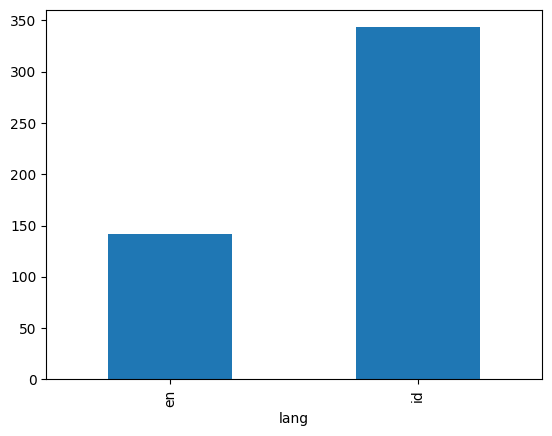

In [9]:
selected_journal.groupby('lang').count().eissn.plot(kind='bar')

In [10]:
selected_journal_en = selected_journal[selected_journal.lang == 'en']
selected_journal_id = selected_journal[selected_journal.lang == 'id']

model_checkpoint = 'bert-base-cased'
model_checkpoint2 = 'indobenchmark/indobert-base-p1'

selected_journal_en.data_cleaned.sample().values[-1], selected_journal_id.data_cleaned.sample().values[-1]

('analisis efisiensi usahatani stroberi (fragaria x ananassa) (studi kasus : desa dolat rakyat kecamatan dolat rakyat kabupaten karo) the purpose of this study is  to analyze the amount of strawberry ushatani income starting from production selling price revenue to net income  analyzing the level of optimization of the use of inputs on strawberry farming  knowing the feasibility of strawberry ushatani is it worth the effort or not the amount of income of a sample farmer is influenced by age farming experience and the number of production factors used the everage strawberry production in the study area is  kg with an average land area of  h the income and income of sample farmers also have an importent effect on the selling price of production where the everage selling price of farmers in the study area is quite large namely rp  kg the everage acceptance of sample farmers in the study area is rp with an average production cost of rp so that it receives an average net income of rpyear an

In [15]:
class BertFinetuning():
    def __init__(self, dataset:pd.DataFrame, model_checkpoint:str, device, batch_size:int) -> None:
        self.dataset = dataset
        self.model_checkpoint = model_checkpoint
        self.device = device

        self.num_labels = dataset.eissn.nunique() + 1
        self.model = BertClassifier(self.num_labels, model_checkpoint)
        self.tokenizer = BertTokenizer.from_pretrained(model_checkpoint)
        
        self.model = self.model.to(self.device)
        self.dataset = BertDataset(self.dataset, self.tokenizer)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr = 2e-5)
        self.data_loader = DataLoader(self.dataset, batch_size, shuffle = True)

    def train(self, epochs:int):
        n_total_steps = len(self.data_loader)

        for epoch in range(epochs):
            for i, batch in enumerate (self.data_loader):

                input_ids, attention_mask, labels = batch
                input_ids = input_ids.to(self.device)
                attention_mask = attention_mask.to(self.device)

                labels = labels.view(-1)
                labels = labels.to(self.device)

                self.optimizer.zero_grad()

                logits = self.model(input_ids, attention_mask)

                loss = self.criterion(logits, labels.long())
                loss.backward()
                self.optimizer.step()


                # if (i+1) % 100 == 0:
                print(f'epoch {epoch + 1}/ {epochs}, batch {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
                
    def save(self, model_path):
        torch.save(self.model.state_dict(), model_path)

In [16]:
finetuning1 = BertFinetuning(selected_journal_en, model_checkpoint, device, 32)
# finetuning2 = BertFinetuning(selected_journal_id, model_checkpoint2, device, 32)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [17]:
finetuning1.train(5)

epoch 1/ 5, batch 1/5, loss = 0.7683
epoch 1/ 5, batch 2/5, loss = 0.7430
epoch 1/ 5, batch 3/5, loss = 0.7238
epoch 1/ 5, batch 4/5, loss = 0.7126
epoch 1/ 5, batch 5/5, loss = 0.7017
epoch 2/ 5, batch 1/5, loss = 0.6937
epoch 2/ 5, batch 2/5, loss = 0.6863
epoch 2/ 5, batch 3/5, loss = 0.6775
epoch 2/ 5, batch 4/5, loss = 0.6674
epoch 2/ 5, batch 5/5, loss = 0.6571
epoch 3/ 5, batch 1/5, loss = 0.6447
epoch 3/ 5, batch 2/5, loss = 0.6319
epoch 3/ 5, batch 3/5, loss = 0.6198
epoch 3/ 5, batch 4/5, loss = 0.6088
epoch 3/ 5, batch 5/5, loss = 0.5970
epoch 4/ 5, batch 1/5, loss = 0.5840
epoch 4/ 5, batch 2/5, loss = 0.5721
epoch 4/ 5, batch 3/5, loss = 0.5600
epoch 4/ 5, batch 4/5, loss = 0.5484
epoch 4/ 5, batch 5/5, loss = 0.5359
epoch 5/ 5, batch 1/5, loss = 0.5223
epoch 5/ 5, batch 2/5, loss = 0.5102
epoch 5/ 5, batch 3/5, loss = 0.4982
epoch 5/ 5, batch 4/5, loss = 0.4874
epoch 5/ 5, batch 5/5, loss = 0.4763


In [12]:
embedding_en = embed(selected_journal_en, model_checkpoint, device = device)
embedding_id = embed(selected_journal_id, model_checkpoint2, device = device)

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [13]:
# tokenizer = BertTokenizer.from_pretrained(model_checkpoint)
# model = BertClassifierEmbed(1, model_checkpoint)
# model.load_state_dict(torch.load('model/finetuned_pipeline3_bert_2.pt'))

# embedding_w_finetune = embed_with_finetune(selected_journal_en.iloc[0:2], tokenizer, model, device)
# embedding_w_finetune[0]

In [14]:
embedding_en.shape, embedding_id.shape

((142, 256, 768), (343, 256, 768))

In [15]:
embeddings = np.append(embedding_en, embedding_id, axis = 0)
embeddings.shape

(485, 256, 768)

In [16]:
X = embeddings.reshape(embeddings.shape[0], -1)

pca = PCA(n_components=2, random_state=0)
X = pca.fit_transform(X)

X.shape

(485, 2)

Best K: 2


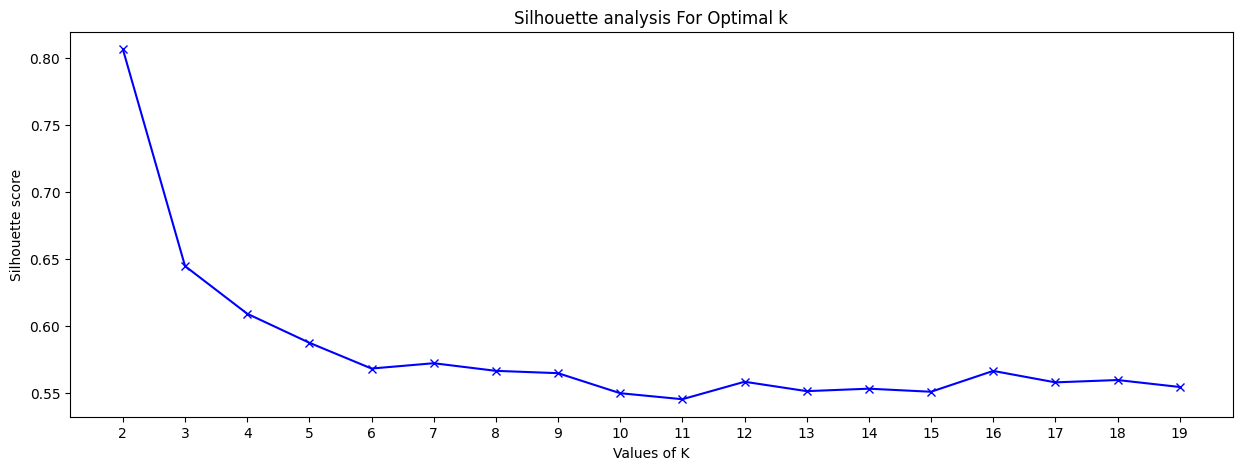

In [17]:
from sklearn.metrics import silhouette_score

def silhouette_method(dataset):
    silhouette_avg = []
    for num_clusters in list(range(2,20)):
        kmeans = KMeans(n_clusters=num_clusters, init = "k-means++", n_init = 10)
        kmeans.fit_predict(dataset)
        score = silhouette_score(dataset, kmeans.labels_)
        silhouette_avg.append(score)

    fig = plt.figure(figsize=(15, 5))
    plt.plot(np.arange(2,20),silhouette_avg,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Silhouette score') 
    plt.title('Silhouette analysis For Optimal k')
    _ = plt.xticks(np.arange(2,20))

    print (f"Best K: {np.argmax(silhouette_avg)+2}")

    return np.argmax(silhouette_avg)+2

best_n = silhouette_method(X)

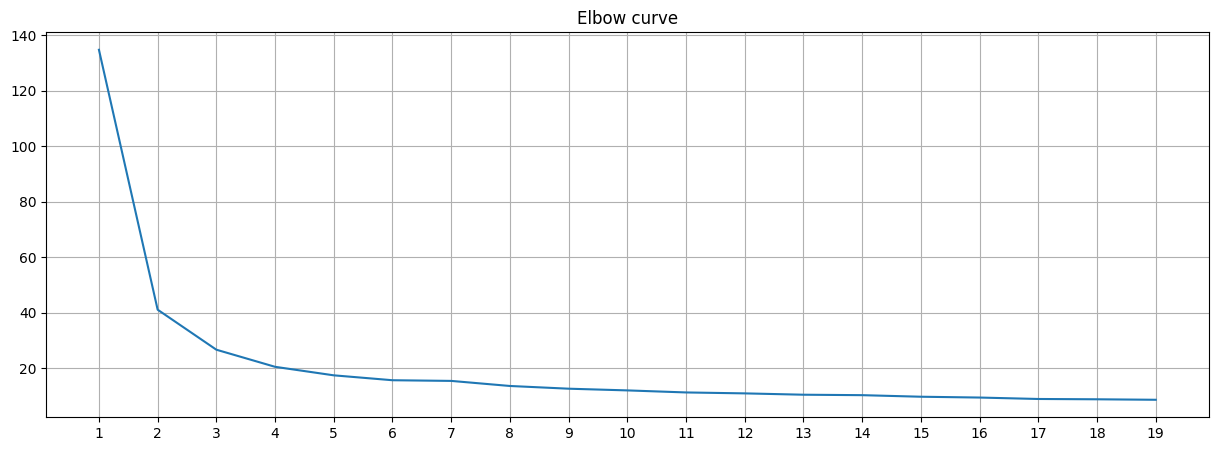

In [18]:
from scipy.spatial.distance import cdist

def elbow_method2(dataset):
    res = list()
    n_cluster = range(1,20)
    for n in n_cluster:
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(dataset)
        res.append(np.average(np.min(cdist(dataset, kmeans.cluster_centers_, 'euclidean'), axis=1)))

    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(1, 20), res)
    plt.xticks(range(1, 20))
    plt.grid(True)
    plt.title('Elbow curve')

elbow_method2(X)

In [19]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=1000)
kmeans.fit(X)

cluster_labels = kmeans.labels_


In [20]:
# Mendapatkan koordinat pusat cluster
centroids = kmeans.cluster_centers_

# Menghitung jarak antara setiap titik data dengan centroid
jarak_ke_centroid = centroid_dist(kmeans, X)

# Menentukan batas jarak yang dianggap sebagai "outscoop"
threshold = outscoop_threshold(jarak_ke_centroid)

# Memisahkan data yang masih masuk dalam "scoop" dan "outscoop"
scoop_data = X[jarak_ke_centroid <= threshold]
outscoop_data = X[jarak_ke_centroid > threshold]

scoop_labels = np.ones(len(X))
scoop_labels[jarak_ke_centroid > threshold] = -1


d:\GitHub\Jurnal-Clustering\functions.py:32: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


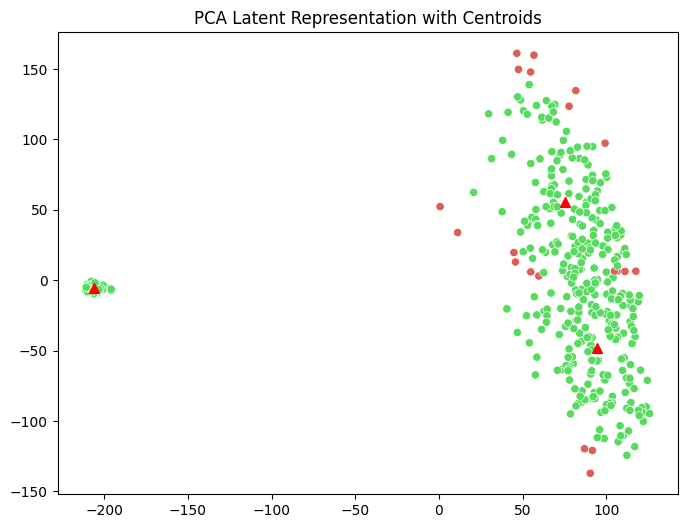

In [21]:
plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop='focus')

In [22]:
save_data(selected_eissn, 'pipeline_3', kmeans, threshold, X, embeddings, selected_journal.data_cleaned, scoop_labels)


Model Kmeans berhasil disimpan
Threshold telah disimpan.
Data sebaran PCA telah disimpan.
Data sebaran PCA telah disimpan.


In [23]:
jurnal_id = selected_eissn
jurnal_type = 'pipeline_3'

kmeans, threshold, X, embeddings, df_res = load_data(jurnal_id, jurnal_type)
scoop_labels = df_res.Label

d:\GitHub\Jurnal-Clustering\functions.py:32: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


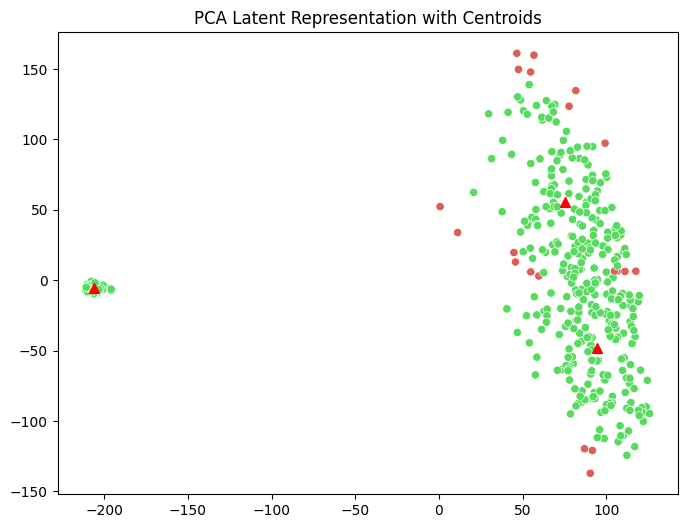

In [24]:
plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop='focus')

d:\GitHub\Jurnal-Clustering\functions.py:32: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  plot = sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='plot_color', data=df_pca, palette=cluster_palette)


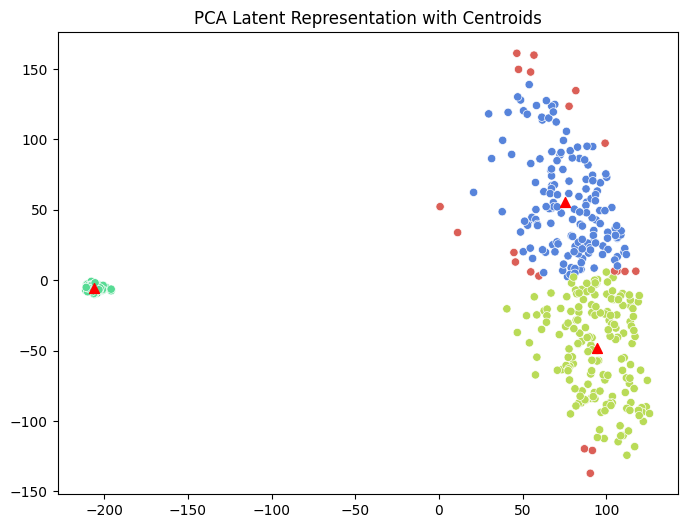

In [25]:
plot_vector_distribution(X, kmeans, scoop_labels, check_outscoop=True)

In [28]:
scoop_labels

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
480    1.0
481    1.0
482   -1.0
483    1.0
484    1.0
Name: Label, Length: 485, dtype: float64

In [30]:
scoop_labels[:len(selected_journal_id)]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
338    1.0
339    1.0
340    1.0
341    1.0
342    1.0
Name: Label, Length: 343, dtype: float64

In [26]:
selected_journal_id['scoop'] = scoop_labels[:len(selected_journal_id)]
selected_journal_en['scoop'] = scoop_labels[len(selected_journal_id):]

C:\Users\rarmn\AppData\Local\Temp\ipykernel_4744\340930450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal_id['scoop'] = scoop_labels[:len(selected_journal_id)]
C:\Users\rarmn\AppData\Local\Temp\ipykernel_4744\340930450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_journal_en['scoop'] = scoop_labels[len(selected_journal_id):]


In [29]:
selected_journal_id

,jid,eissn,desc,title,date,data_cleaned,lang,label,scoop
210447,18473,26543915,"Dalam konteks perusahaan start-up, dinamika ke...",dinamika kepemimpinan transformasional dalam m...,2024-05-02,dinamika kepemimpinan transformasional dalam m...,id,0,NaN
210449,18473,26543915,Kabupaten samosir merupakan daerah yang berpot...,implementasi peraturan pemerintah nomor 27 tah...,2022-11-09,implementasi peraturan pemerintah nomor 27 tah...,id,0,NaN
210450,18473,26543915,Air preheater B Tipe Ljungstrom adalah jenis A...,analisis efektivitas alat penukar kalor air pr...,2024-02-29,analisis efektivitas alat penukar kalor air pr...,id,0,NaN
210451,18473,26543915,Dengan makin berkembangnya ilmu pengetahuan da...,perancangan mesin pengayak pasir dengan kapasi...,2018-10-03,perancangan mesin pengayak pasir dengan kapasi...,id,0,NaN
210452,18473,26543915,Studi ini bertujuan untuk mengetahui perlindun...,analisis hukum terhadap sertifikat atas kesala...,2022-07-14,analisis hukum terhadap sertifikat atas kesala...,id,0,NaN
...,...,...,...,...,...,...,...,...,...
211135,18473,26543915,Website Selain berfungsi sebagai sarana inform...,sistem informasi pemesanan perbaikan kendaraaa...,2022-10-31,sistem informasi pemesanan perbaikan kendaraaa...,id,0,NaN
211136,18473,26543915,Mengabadikan setiap momen penting dalam hidup ...,kompilasi expresi dokumentasi persalinan pada...,2024-02-21,kompilasi expresi dokumentasi persalinan pada...,id,0,NaN
211137,18473,26543915,Asuransi ialah yang memberikan pembayaran seju...,penyelesaian klaim asuransi jiwa pada pt. prud...,2022-04-20,penyelesaian klaim asuransi jiwa pada pt. prud...,id,0,NaN
211138,18473,26543915,Penelitian berjudul “Komunikasi Antarpribadi G...,komunikasi antarpribadi guru bimbingan konseli...,2023-12-26,komunikasi antarpribadi guru bimbingan konseli...,id,0,NaN


In [27]:
selected_journal_id.groupby('scoop').count().jid, selected_journal_en.groupby('scoop').count().jid

(Series([], Name: jid, dtype: int64), Series([], Name: jid, dtype: int64))